In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical

import sys
import os
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print('학습용 데이터 셋 이미지 수 : %d 개'%len(x_train)) # x_train.shape[0]
print('테스트용 데이터 셋 이미지 수 : %d 개'%len(x_test)) # x_test.shape[0]

학습용 데이터 셋 이미지 수 : 60000 개
테스트용 데이터 셋 이미지 수 : 10000 개


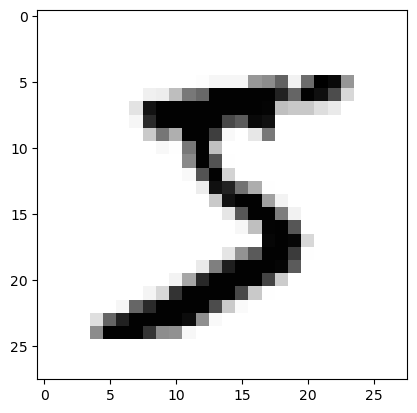

In [4]:
# 첫번째 이미지 확인

plt. imshow(x_train[0], cmap = 'Greys')
plt.show()

In [5]:
# 이미지 생성 원리 알고 싶어요

for x in x_train[0] :
    for i in x :
        sys.stdout.write("%-3s"%i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
# 차원 변환 과정 실습
x_train = x_train.reshape(x_train.shape[0], -1) #(x_train.shape[0], 784) (28*28)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

x_train = x_train / 255 # 정규화(0~1 사이로 나타내기 위함)
x_test = x_test / 255



In [7]:
# 클래스 값 확인
print('class : %d '%(y_train[0]))

class : 5 


In [8]:
# 이진화(binary) > one hot encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [9]:
y_train.shape

(60000, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
# 딥러닝 기본 프레임 만들기

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [12]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 체크포인트 및 얼리스탑 지정
modelpath = './model/MNIST/minst_mlp.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

# 모델실행
history = model.fit(x_train, y_train, validation_split = 0.25, epochs=30, batch_size=200, verbose = 0,
                    callbacks=[early_stopping_callback, checkpointer])

print('\n test ACC : %.4f'%(model.evaluate(x_test, y_test)[1]))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________

Epoch 1: val_loss improved from inf to 0.18243, saving model to ./model/MNIST\minst_mlp.hdf5

Epoch 2: val_loss improved from 0.18243 to 0.13225, saving model to ./model/MNIST\minst_mlp.hdf5

Epoch 3: val_loss improved from 0.13225 to 0.10982, saving model to ./model/MNIST\minst_mlp.hdf5

Epoch 4: val_loss improved from 0.10982 to 0.09629, saving model to ./model/MNIST\minst_mlp.hdf5

Epoch 5: val_loss improved from 0.09629 to 0.08932, savin

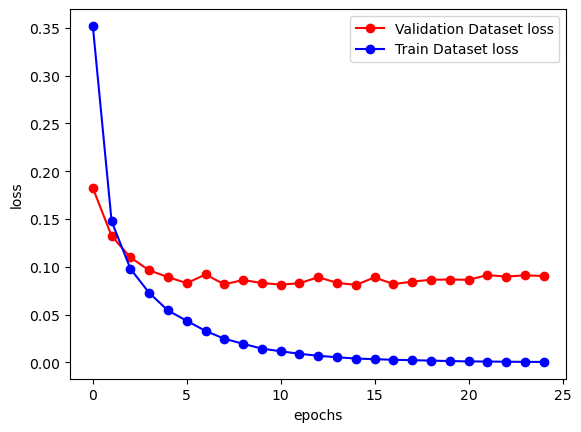

In [13]:
# 학습용 데이터 셋 / 검증 셋 오차 저장

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = 'o', c = 'red', label = 'Validation Dataset loss')
plt.plot(x_len, y_loss, marker = 'o', c = 'blue', label = 'Train Dataset loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
# 차원 변환 과정 실습
x_train = x_train.reshape(x_train.shape[0], 28,28,1) #(x_train.shape[0], 784) (28*28)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

x_train = x_train / 255 # 정규화(0~1 사이로 나타내기 위함)
x_test = x_test / 255


In [17]:
# 이진화(binary) > one hot encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [18]:
# CNN 신경망 설정

# 모델 구조 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()

# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 체크포인트 및 얼리스탑 지정
modelpath = './model/MNIST/minst_cnn.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

# 모델실행
history = model.fit(x_train, y_train, validation_split = 0.25, epochs=30, batch_size=200, verbose = 0,
                    callbacks=[early_stopping_callback, checkpointer])

print('\n test ACC : %.4f'%(model.evaluate(x_test, y_test)[1]))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      